# Data Collection & Observation


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Connect to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read training data file
trainfile = r'/content/drive/MyDrive/CIS508/HW1/SCS_Train.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'//content/drive/MyDrive/CIS508/HW1/SCS_TEST.csv'
testData = pd.read_csv(testfile)

# See the columns
trainData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [ ]:
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


# Data Preprocessing

In [ ]:
#  Check if any null values in dataframe
trainData.isnull().sum().sum()

0

In [ ]:
# Drop duplicate records
trainData = trainData.drop("ID", axis=1)
original_records = trainData.shape[0]

trainData = trainData.drop_duplicates()
print(f"Dropped {original_records - trainData.shape[0]} duplicate records")

Dropped 4807 duplicate records


In [ ]:
# Count of class 0 and 1 in TARGET columns
# class 0: satisfied customers
trainData.TARGET.value_counts()

0    68398
1     2815
Name: TARGET, dtype: int64

In [ ]:
# Select the first 370 columns of trainData
features = trainData.iloc[:, :370]

# Calculate the correlation of each feature with the TARGET column
correlations = features.corrwith(trainData['TARGET'])
print(correlations)

var3                       0.004146
var15                      0.097508
imp_ent_var16_ult1        -0.000007
imp_op_var39_comer_ult1    0.010763
imp_op_var39_comer_ult3    0.003687
                             ...   
saldo_medio_var44_hace3   -0.002636
saldo_medio_var44_ult1    -0.003204
saldo_medio_var44_ult3    -0.003112
var38                     -0.020117
TARGET                     1.000000
Length: 370, dtype: float64


In [ ]:
# Absolute value of the correlation
abs_correlations = correlations.abs()

# mean and median
mean_corr = abs_correlations.mean()
median_corr = abs_correlations.median()

# Top 25% & 75% percentile
q25_corr = abs_correlations.quantile(0.25)
q75_corr = abs_correlations.quantile(0.75)

print("Mean:", mean_corr)
print("Median:", median_corr)
print("Top 25% percentile:", q25_corr)
print("Top 75% percentile:", q75_corr)

Mean: 0.016018794236927
Median: 0.004788624006095492
Top 25% percentile: 0.001406988437643165
Top 75% percentile: 0.01885155322457512


#### Drop the column that the correlation is smaller than top 75% percentile

In [ ]:
# Filter and drop columns with correlation coefficients smaller than the 75th percentile
columns_to_drop = abs_correlations[abs_correlations < q75_corr].index
# Add "TARGET" to the list of columns to drop
columns_to_drop = columns_to_drop.append(pd.Index(["TARGET"]))

trainData_2 = trainData.drop(columns=columns_to_drop, axis=1)

trainData_2.head()

,var15,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var2_0,...,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_medio_hace3,var38
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,39205.170
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.00,0.00,0.00,0.00,300.0,300.0,240.75,0,49278.030
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,3.00,2.07,0.00,0.00,0.0,0.0,0.00,0,67333.770
3,37,0.0,0.0,0.0,0.0,195.0,0.0,0.0,195.0,0,...,0,186.09,138.84,0.00,0.00,0.0,0.0,0.00,0,64007.970
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,3.00,13501.47,85501.89,85501.89,0.0,0.0,0.00,0,117310.979


In [ ]:
columns_to_remove = [col for col in trainData if col not in trainData_2 and col != 'TARGET']


trainData = trainData.drop(columns=columns_to_remove)
trainData.head()

,var15,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var2_0,...,saldo_medio_var5_hace2,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_medio_hace3,var38,TARGET
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,39205.170,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.00,0.00,0.00,300.0,300.0,240.75,0,49278.030,0
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,3.00,2.07,0.00,0.00,0.0,0.0,0.00,0,67333.770,0
3,37,0.0,0.0,0.0,0.0,195.0,0.0,0.0,195.0,0,...,186.09,138.84,0.00,0.00,0.0,0.0,0.00,0,64007.970,0
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,3.00,13501.47,85501.89,85501.89,0.0,0.0,0.00,0,117310.979,0


In [ ]:
columns_to_remove = [col for col in testData if col not in trainData_2]

testData2 = testData.drop(columns=columns_to_remove)
testData2.head()

,var15,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var2_0,...,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_medio_hace3,var38
0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,6.0,4.80,0.0,0.0,0.0,0.0,0.0,0,40532.10
1,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,3.0,2.85,0.0,0.0,0.0,0.0,0.0,0,45486.72
2,23,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0,...,0,90.0,66.15,0.0,0.0,0.0,0.0,0.0,0,46993.95
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,187898.61
4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,30.0,21.30,0.0,0.0,0.0,0.0,0.0,0,73649.73


# Model Selection & Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

### Try

In [ ]:
'''
def SCS_model(model, data, outcome, t_size, rs_number):
  X = data2
  y = data[outcome]
  # Split data to the train data and the test data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=rs_number)

  # Modeling
  model.fit(X_train, y_train)

  # Test
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  print(f"Accuracy:{accuracy}")
  print(f"Recall:{recall}")
  print(f"Precision:{precision}")
'''

In [ ]:
'''
# Decisiion Tree
outcome_var = 'TARGET'

model = DecisionTreeClassifier()
'''
  (
    criterion='entropy',      # Change the splitting criterion
    max_depth=5,              # Limit the depth of the tree
    min_samples_leaf=4,       # Set a minimum number of samples per leaf
    min_samples_split=11,     # Set a minimum number of samples per split
    max_features='sqrt',      # Control the number of features considered for the split
    random_state=6            # Set a specific random seed for reproducibility
)
'''

SCS_model(model, trainData, outcome_var, trainData_2, 0.67, 9)
'''

In [ ]:
'''
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=20,
    min_samples_split=10,
    max_features='sqrt',
    random_state=6
)
model.fit(trainData.drop(columns=['TARGET']), trainData['TARGET'])

# Use the model to predict the "TARGET" column for testData2
predictions = model.predict(testData2.drop(columns=['TARGET']))

# Update the "TARGET" column in testData2 with the predicted values
testData2['TARGET'] = predictions

# Print the updated testData2 with predicted "TARGET" values
testData2.head()
'''

,var15,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var2_0,...,saldo_medio_var5_hace2,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_medio_hace3,var38,TARGET
0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,6.0,4.80,0.0,0.0,0.0,0.0,0.0,0,40532.10,0
1,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,3.0,2.85,0.0,0.0,0.0,0.0,0.0,0,45486.72,0
2,23,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0,...,90.0,66.15,0.0,0.0,0.0,0.0,0.0,0,46993.95,0
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,187898.61,0
4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,30.0,21.30,0.0,0.0,0.0,0.0,0.0,0,73649.73,0


### Try2

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0', 'num_var24', 'num_var25_0', 'num_var25', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var30_0', 'num_var30',

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData2
print(Xtest.shape)

(71213, 117)
(71213, 1)
(75818, 117)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)
Y_Pred = dt.predict(Xtest)
print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

[0 0 0 ... 0 0 0]
       TARGET
0           0
1           0
2           0
3           0
4           0
...       ...
75813       0
75814       0
75815       0
75816       0
75817       0

[75818 rows x 1 columns]


In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    68398
1     2815
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

X_Pred = dt.predict(Xtrain)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Ytrain,X_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

Accuracy: 0.9971493968797832


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .30, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

Accuracy: 0.9307245834113462


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[19759   769]
 [  711   125]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     20528
           1       0.14      0.15      0.14       836

    accuracy                           0.93     21364
   macro avg       0.55      0.56      0.55     21364
weighted avg       0.93      0.93      0.93     21364



[Text(0.47213752924839597, 0.99, 'x[76] <= 2.955\ngini = 0.076\nsamples = 49849\nvalue = [47870, 1979]'),
 Text(0.20116885784578242, 0.97, 'x[0] <= 27.5\ngini = 0.168\nsamples = 13048\nvalue = [11844, 1204]'),
 Text(0.05977423558732446, 0.95, 'x[116] <= 56980.395\ngini = 0.049\nsamples = 6729\nvalue = [6561, 168]'),
 Text(0.024340839331099526, 0.93, 'x[0] <= 24.5\ngini = 0.121\nsamples = 1054\nvalue = [986, 68]'),
 Text(0.009556242928024065, 0.91, 'x[116] <= 13669.47\ngini = 0.088\nsamples = 806\nvalue = [769, 37]'),
 Text(0.009088659176194142, 0.89, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.01002382667985399, 0.89, 'x[116] <= 56961.629\ngini = 0.085\nsamples = 805\nvalue = [769, 36]'),
 Text(0.009556242928024065, 0.87, 'x[116] <= 33382.275\ngini = 0.083\nsamples = 804\nvalue = [769, 35]'),
 Text(0.007773579874172482, 0.85, 'x[116] <= 28663.455\ngini = 0.017\nsamples = 118\nvalue = [117, 1]'),
 Text(0.007305996122342558, 0.83, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Te

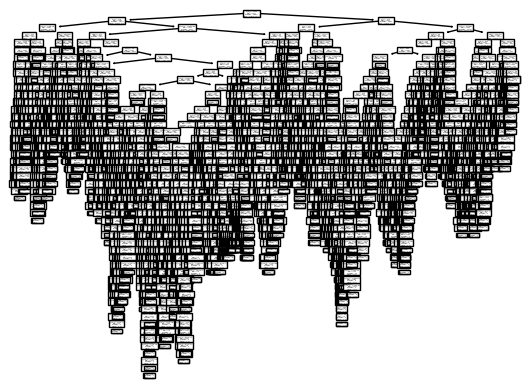

In [ ]:
#Plotting the decesion Tree
tree.plot_tree(dt)

# Prediction

In [ ]:
X_test = testData2

predictions = dt.predict(X_test)

testData2['TARGET'] = predictions

In [ ]:
#Get Class Prediction probabilities as a data frame
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(dt.predict_proba(X_train))

pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
#Write into a file with actual prediction and corresponding probability
pred=pd.DataFrame(dt.predict(X_train),columns=["TARGET"])
pd.concat([pred,pred_Probability],axis=1).to_csv("/content/drive/MyDrive/CIS508/HW1/Result.csv", index = None)

res=pd.read_csv('/content/drive/MyDrive/CIS508/HW1/Result.csv')
res.head()

,TARGET,0,1
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,0,1.0,0.0
4,0,1.0,0.0


In [ ]:
testData2.TARGET.value_counts()

0    72916
1     2902
Name: TARGET, dtype: int64

In [ ]:
#Print Classification Report
print(classification_report(Y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47870
           1       1.00      0.94      0.97      1979

    accuracy                           1.00     49849
   macro avg       1.00      0.97      0.98     49849
weighted avg       1.00      1.00      1.00     49849



In [ ]:
testData2.head()

,var15,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var2_0,...,saldo_medio_var5_hace2,saldo_medio_var5_ult3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_medio_hace3,var38,TARGET
0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,6.0,4.80,0.0,0.0,0.0,0.0,0.0,0,40532.10,0
1,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,3.0,2.85,0.0,0.0,0.0,0.0,0.0,0,45486.72,0
2,23,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0,...,90.0,66.15,0.0,0.0,0.0,0.0,0.0,0,46993.95,0
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,187898.61,0
4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,30.0,21.30,0.0,0.0,0.0,0.0,0.0,0,73649.73,0


In [ ]:
Kaggle = pd.DataFrame({'ID': testData['ID'], 'TARGET': testData2['TARGET']})

print(Kaggle)

           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


In [ ]:
Kaggle.to_csv('/content/drive/MyDrive/CIS508/HW1/forKaggle.csv', index=False)